In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


test_data = pd.read_csv("/Users/hyunwoo/Downloads/nsmc-master/ratings_test.txt",sep ="\t")
train_data = pd.read_csv("/Users/hyunwoo/Downloads/nsmc-master/ratings_train.txt",sep="\t")

In [2]:
train_data.isnull().sum()
train_data.dropna(inplace = True)
train_data.reset_index(inplace= True , drop = True)

In [3]:
train_data['label'].value_counts() # not class imbalanced 

0    75170
1    74825
Name: label, dtype: int64

In [4]:
train_target = train_data['label']
train_target
# Label 0 은 부정적 의견 Label 1 은 긍정적 의견

0         0
1         1
2         0
3         0
4         1
         ..
149990    0
149991    1
149992    0
149993    1
149994    0
Name: label, Length: 149995, dtype: int64

# 텍스트 데이터 전처리

In [5]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149990,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149991,8549745,평점이 너무 낮아서...,1
149992,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149993,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


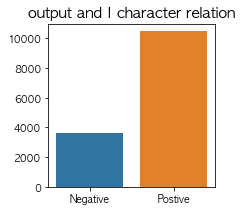

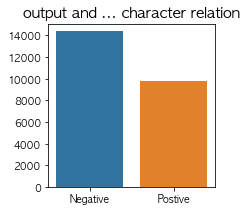

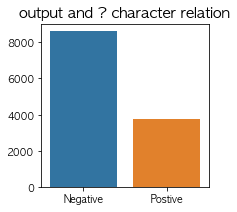

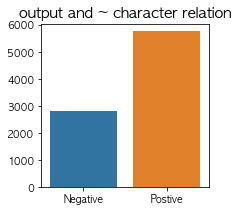

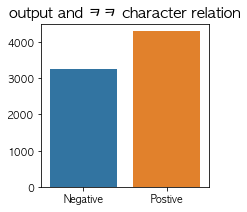

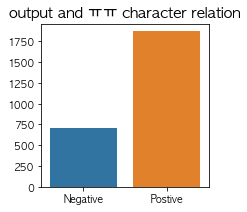

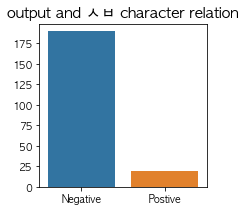

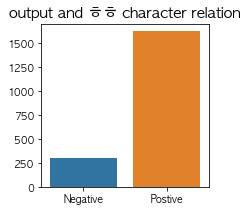

In [6]:
#느낌표가 들어간 리뷰들과 물음표가들어간 느낌표 ...이 많은데이터들을 파악해 전처리에서 특수문자를 제거할지 안할지 선택함
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
#그래프 내 한글 문제표기 때문

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

target_character = ["!","...","?","~","ㅋㅋ","ㅠㅠ","ㅅㅂ","ㅎㅎ"]
for idx,char in enumerate(target_character):
    result = train_data[train_data['document'].str.contains(char,regex=False)]['label'].value_counts().sort_index()
    result.index = np.array(["Negative","Postive"])
    plt.figure(idx,figsize = (3,3))
    sns.barplot(x = result.index, y = result.values).set_title("output and {0} character relation".format(char),size =15)
    
#물음표     

In [20]:
#위의 결과로부터 !, ? , ㅋㅋ, ㅠㅠ 등은 제거하지 않음 즉 특수문자들도 포함
from sklearn.feature_extraction.text import CountVectorizer
countVector = CountVectorizer(stop_words = ["내가"],max_df = 0.1)
countVector.fit(train_data['document'])
cvdf = countVector.transform(train_data['document'])

df = pd.DataFrame(data = cvdf.toarray(),columns = countVector.get_feature_names_out())
df

,00,000,0000000000000000,00000000000000000000000000000을달라,000000000000000001개짜리,000000000점,00000001,0000000을,0000643652,0001,...,힛처,힛쳐하길래보는데,힛힛,힝상응원해요,힝힝,힣히히헤ㅎ,盧미오,綠林의,不好,紐⑦넗濡쒕씪異⑹쟾濡
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:

# 다 빈출단어 뽑아내고싶어서 Min_df =0.01로 바꿈 
countVector = CountVectorizer(stop_words = ["내가"],min_df = 0.01)
countVector.fit(train_data['document'])
cvdf = countVector.transform(train_data['document'])

df = pd.DataFrame(data = cvdf.toarray(),columns = countVector.get_feature_names_out())
df['target'] = train_data['label']
df.groupby('target').sum()

,ㅋㅋ,그냥,그리고,너무,다시,드라마,보고,보는,봤는데,스토리,...,이런,이렇게,있는,정말,좋은,진짜,최고,최고의,평점,평점이
target,,,,,,,,,,,,,,,,,,,,,
0,1032,2663,714,4067,316,677,997,843,988,1078,...,2016,1077,472,2847,529,3515,99,190,1156,712
1,1526,939,1138,4502,1325,1340,1635,806,1298,541,...,1470,823,1302,5695,1265,3177,1522,2072,706,946


In [21]:
from soynlp.normalizer import *

emoticon_normalize('ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ쿠ㅜㅜㅜㅜㅜㅜ', num_repeats=3)
# 'ㅋㅋㅋㅜㅜㅜ'

repeat_normalize('와하하하하하하하하하핫', num_repeats=2)
# '와하하핫'

only_hangle('가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫')
# '가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜ 아핫'

only_hangle_number('가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫')
# '가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜ 123 아핫'

only_text('가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫')
# '가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫'



'가나다ㅏㅑㅓㅋㅋ쿠ㅜㅜㅜabcd123!!아핫'

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVector = TfidfVectorizer(ngram_range = (1,2))
tfidfVector.fit(train_data['document'])
tfidf = tfidfVector.transform(train_data[s'document'])
tfidf.columns

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149990,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149991,8549745,평점이 너무 낮아서...,1
149992,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149993,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
